In [1]:
#!pip install datatable
#!pip install pycaret

In [2]:
import pandas as pd
import datatable as dt 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
monthyear = 'feb2022'

In [5]:
raw = pd.read_feather("../content/drive/MyDrive/RAFI/Fraud Detection/Data Sources/" + monthyear + "withdrawal.feather")

In [6]:
raw['Transaction Type'].value_counts()

Withdrawal    142246
Name: Transaction Type, dtype: int64

In [7]:
raw = raw[raw['Transaction ID'] != 'Records from date:']

In [8]:
raw["Transaction Amount"] = pd.to_numeric(raw["Transaction Amount"], errors='coerce')
raw["Service Fee"] = pd.to_numeric(raw["Service Fee"], errors='coerce')
raw["Loan Amount"] = pd.to_numeric(raw["Loan Amount"], errors='coerce')
raw["Total Loan Outstanding (OLB)"] = pd.to_numeric(raw["Total Loan Outstanding (OLB)"], errors='coerce')
raw["Deposit Balance"] = pd.to_numeric(raw["Deposit Balance"], errors='coerce')
raw["Interest"] = pd.to_numeric(raw["Interest"], errors='coerce')
raw["Principal"] = pd.to_numeric(raw["Principal"], errors='coerce')
raw["Penalty"] = pd.to_numeric(raw["Penalty"], errors='coerce')
raw["Fee"] = pd.to_numeric(raw["Fee"], errors='coerce')
raw['Entry Time'] = raw['Entry Time'].astype('datetime64[ns]')
raw['Transaction Date'] = raw['Transaction Date'].astype('datetime64[ns]')

In [9]:
# Extract Time and Weekday
raw['Entry Hour'] = raw['Entry Time'].dt.hour
raw['Entry Day'] = raw['Entry Time'].dt.strftime("%A")

In [10]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142246 entries, 0 to 142245
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Transaction ID                142246 non-null  object        
 1   Client ID                     142246 non-null  object        
 2   Branch                        142246 non-null  object        
 3   First Name                    142246 non-null  object        
 4   Middle Name                   142238 non-null  object        
 5   Last Name                     142246 non-null  object        
 6   Street                        141807 non-null  object        
 7   Village                       142206 non-null  object        
 8   City                          142154 non-null  object        
 9   State                         142246 non-null  object        
 10  Country                       142246 non-null  object        
 11  Client Type  

### Distribution of Raw Data (Population)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


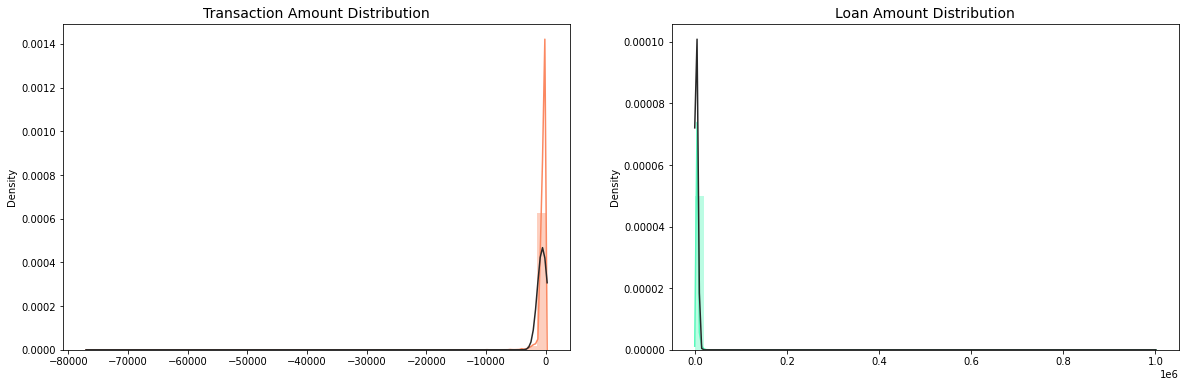

In [11]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))

v14_fraud_dist = raw['Transaction Amount'].loc[raw['Transaction Type'] == 'Withdrawal'].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Transaction Amount Distribution', fontsize=14)

v12_fraud_dist = raw['Deposit Balance'].loc[raw['Transaction Type'] == 'Withdrawal'].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Loan Amount Distribution', fontsize=14)

plt.show()

## Getting the Sample

In [12]:
df = raw[raw['Transaction Type'] == 'Withdrawal']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142246 entries, 0 to 142245
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Transaction ID                142246 non-null  object        
 1   Client ID                     142246 non-null  object        
 2   Branch                        142246 non-null  object        
 3   First Name                    142246 non-null  object        
 4   Middle Name                   142238 non-null  object        
 5   Last Name                     142246 non-null  object        
 6   Street                        141807 non-null  object        
 7   Village                       142206 non-null  object        
 8   City                          142154 non-null  object        
 9   State                         142246 non-null  object        
 10  Country                       142246 non-null  object        
 11  Client Type  

In [14]:
df.describe()

,Transaction Amount,Service Fee,Loan Amount,Total Loan Outstanding (OLB),Deposit Balance,Interest,Principal,Penalty,Fee,Entry Hour
count,142246.000000,0.0,0.0,0.0,1.422460e+05,0.0,0.0,0.0,0.0,142246.000000
mean,-544.481082,NaN,NaN,NaN,2.362503e+03,NaN,NaN,NaN,NaN,15.981251
std,853.198852,NaN,NaN,NaN,3.529607e+03,NaN,NaN,NaN,NaN,2.282306
min,-76821.350000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.000000
25%,-620.000000,NaN,NaN,NaN,1.137612e+03,NaN,NaN,NaN,NaN,15.000000
50%,-400.000000,NaN,NaN,NaN,1.793970e+03,NaN,NaN,NaN,NaN,16.000000
75%,-200.000000,NaN,NaN,NaN,2.915380e+03,NaN,NaN,NaN,NaN,17.000000
max,-0.010000,NaN,NaN,NaN,1.000001e+06,NaN,NaN,NaN,NaN,23.000000


We have to exclude Service Fee and Fee because these columns do not have data.

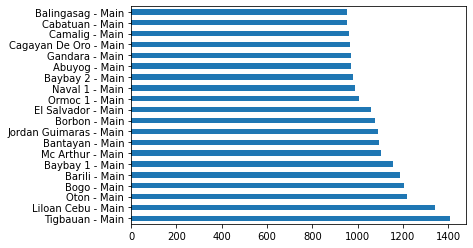

In [15]:
df['Branch'].value_counts()[:20].plot(kind='barh')

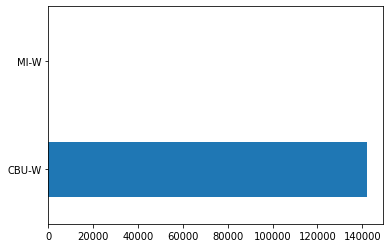

In [16]:
df['Deposit Product ID'].value_counts()[:20].plot(kind='barh')

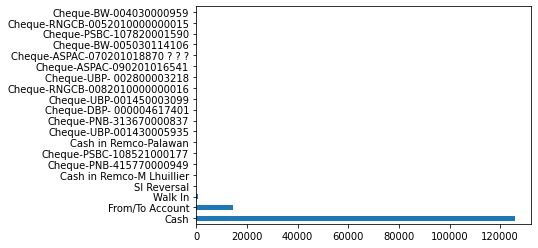

In [17]:
df['Payment Method'].value_counts()[:20].plot(kind='barh')

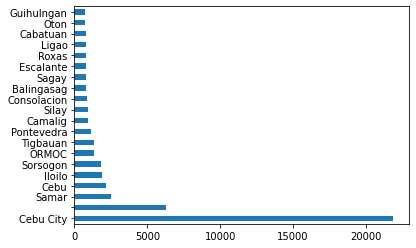

In [18]:
df['City'].value_counts()[:20].plot(kind='barh')

Check why this is Cebu City and does not align with the distribution per branch.

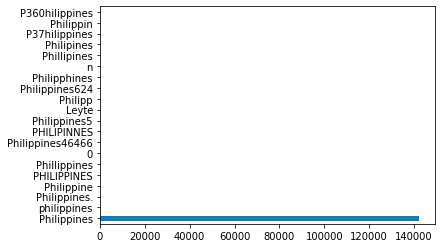

In [19]:
df['Country'].value_counts()[:20].plot(kind='barh')

## Anomaly Detection

In [20]:
test = df[['Transaction ID', 'Branch', 'Deposit Product ID', 'Transaction Date', 'Entry Hour', 'Entry Day',
           'Entry Time', 'Username', 'Payment Method', 'Transaction Amount',
           'Deposit Balance']]

In [ ]:
from pycaret.anomaly import *
s = setup(test,
          normalize=True,
          transformation=True,
         # high_cardinality_features=['Loan Product ID'], 
         # categorical_features=['Client ID'], 
          ignore_features=['Transaction ID'],
          #combine_rare_levels=True,
          remove_multicollinearity=True,
          session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(142246, 11)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,5
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(142246, 178)"
9,CPU Jobs,-1


In [ ]:
iforest = create_model('iforest', fraction = 0.05)
iforest_results = assign_model(iforest)
iforest_results.head()

,Transaction ID,Branch,Deposit Product ID,Transaction Date,Entry Hour,Entry Day,Entry Time,Username,Payment Method,Transaction Amount,Deposit Balance,Anomaly,Anomaly_Score
0,55179146,Banga - Main,CBU-W,2022-02-05,20,Sunday,2022-02-06 20:56:16,angel.asuncion,Cash,-400.00,1309.59,1,0.000106
1,55179145,Banga - Main,CBU-W,2022-02-05,20,Sunday,2022-02-06 20:53:17,angel.asuncion,Cash,-150.00,2117.89,1,0.003945
2,55179144,Banga - Main,CBU-W,2022-02-05,20,Sunday,2022-02-06 20:49:36,angel.asuncion,Cash,-395.05,1207.99,0,-0.000138
3,55179143,Banga - Main,CBU-W,2022-02-05,20,Sunday,2022-02-06 20:47:29,angel.asuncion,Cash,-395.05,1373.39,1,0.000597
4,55179142,Banga - Main,CBU-W,2022-02-05,20,Sunday,2022-02-06 20:44:13,angel.asuncion,Cash,-118.00,766.56,1,0.002291


### Learning Curve

In [ ]:
#plot_model(iforest)

### Save Model / Experiment

In [ ]:
# saving model
save_model(iforest, model_name = '/content/drive/MyDrive/RAFI/Fraud Detection/Data Sources/anomaly_detection_withdrawal_for_deployment' + monthyear)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Transaction ID'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value...
                  Fix_multicollinearity(correlation_with_target_preference=None,
                                        correlation_with_target_threshold=0.0,
                                        target_variable='UNSUPERVISED_DUMMY_TARGET',
                      

You can load saved model and saved experiment using load_model and load_experiment function available in all modules of PyCaret.

## Predictions

In [ ]:
withdrawal = raw[raw['Transaction Type'] == 'Withdrawal']

In [ ]:
predictions = predict_model(iforest, data=withdrawal)

In [ ]:
predictions = predictions[predictions['Anomaly'] == 1]
predictions.to_csv('/content/drive/MyDrive/RAFI/Fraud Detection/Data Sources/Withdrawal Predictions_' + monthyear + '.csv', index=False)

In [ ]:
print('The End.')  

The End.
